# EDA for Languages & Frameworks by countries

> Focusing on the languages and frameworks used by country. I have analyzed using Kaggle's ML & DS survey data. This notebook is not good enough, but I ask for a lot of interest and comment.


1. Analysis of importance of language by country using (Q3 & Q8)
2. Analysis of the number of languages used on a regular basis by country (Q3 & Q7_part_1~12+Other)
3. Analysis of the number of visualization libraries used on a regular basis by country (Q3 & Q14_part_1~11+Other)
4. Analysis of machine learning experiences by country (Q3 & Q15)
5. Analysis of machine learning framework by country (Q3 & Q16_Part_1~15+Other)
6. Analysis of important activities by country (Q3 & Q23_Part_1~7+Other)
7. (ing)
8. (ing)
9. (ing)
10. (ing)

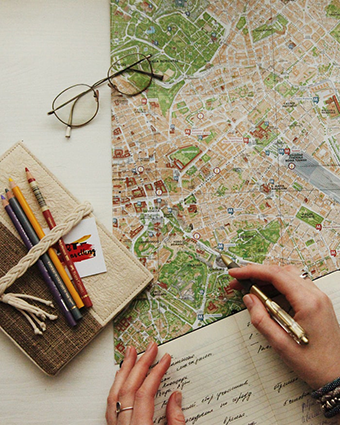

In [ ]:
!pip install --upgrade seaborn

In [ ]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [ ]:
df_responses = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
df_responses = df_responses.drop([0])
df_responses

# preprocess for Rebpulic of Korea.

Through [Hoyeol Kim](https://www.kaggle.com/elibooklover)'s comment, I found that the country (Q3) South Korea is divided into South Korea and Republic of Korea. Although actually used as two names, they represent the same country.

In [ ]:
df_responses[df_responses['Q3']=='South Korea']

In [ ]:
df_responses[df_responses['Q3']=='Republic of Korea']

In [ ]:
df_responses.loc[df_responses.Q3 =='Republic of Korea', 'Q3'] = 'South Korea'

In [ ]:
df_responses[df_responses['Q3']=='South Korea']

# EDA

## 1. Analysis of importance of language by country using (Q3 & Q8)

We can analyze which languages are important to each country through Q3 and Q8.

Python is considered overwhelmingly important. After that, many people think R is important, but there are cases where it is not considered important by country. As for SQL and C++, it can be seen that opinions differ greatly by country.

- [Q3]  'In which country do you currently reside?'
- [Q8] 'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'

In [ ]:
figure(num=None, figsize=(10, 14), dpi=80, facecolor='w', edgecolor='k')
sns.histplot(df_responses, y="Q3", hue="Q8", stat="probability", multiple="fill", shrink=.6)

Since the proportion of Python is high, excluding Python is as follows.

In [ ]:
df_temp = df_responses.copy()
df_temp.loc[df_temp['Q8'] == 'Python'] = None
df_temp = df_temp[df_temp['Q8'].notna()]

figure(num=None, figsize=(10, 14), dpi=80, facecolor='w', edgecolor='k')
sns.histplot(df_temp, y="Q3", hue="Q8", stat="probability", multiple="fill", shrink=.6)

## 2. Analysis of the number of languages used on a regular basis by country (Q3 & Q7_part_1~12+Other)

 Q7 consists of 12 parts and indicates which language is used on a regular basis. Since multiple selections are possible, combining this information will reveal how many languages are spoken per person. Let's look at it by country.
 
 We can see that there are many people who speak one to three languages. 
 
 - [Q7] What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python, R, SQL, C, C++, Java, Javascript, Julia, Swift, Bash, MATLAB, None, Other

In [ ]:
df_responses['Q7'] = df_responses[df_responses.columns[7:19]].apply(lambda x: len(x.dropna().astype(str)),axis=1)

figure(num=None, figsize=(10, 14), dpi=80, facecolor='w', edgecolor='k')
sns.histplot(df_responses, y="Q3", hue="Q7", stat="probability", multiple="fill", shrink=.6)

## 3. Analysis of the number of visualization libraries used on a regular basis by country (Q3 & Q14_part_1~11+Other)

Talking about how many data visualization libraries are handled is no different from the language. IMHO, people usually think that it's okay to choose 1-3 things they know how to do.

[Q14] What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice


In [ ]:
df_responses['Q14'] = df_responses[df_responses.columns[53:63]].apply(lambda x: len(x.dropna().astype(str)),axis=1)

df_temp = df_responses.copy()
df_temp = df_temp[df_temp['Q14'].notna()]

figure(num=None, figsize=(10, 14), dpi=80, facecolor='w', edgecolor='k')
sns.histplot(df_temp, y="Q3", hue="Q14", stat="probability", multiple="fill", shrink=.6)

## 4. Analysis of machine learning experiences by country (Q3 & Q15)

Let's look at the distribution of machine learning experiences by country.

[Q15] For how many years have you used machine learning methods?

In [ ]:
figure(num=None, figsize=(10, 14), dpi=120, facecolor='w', edgecolor='k')
sns.histplot(df_responses, y="Q3", hue="Q15", stat="count", multiple="stack", shrink=.6)

I wondered how many great people there are with more than 5 years of experience.

In [ ]:
df_temp = df_responses.copy()
df_temp.loc[ df_temp['Q15'] == '1-2 years' ] = None
df_temp.loc[ df_temp['Q15'] == '3-4 years' ] = None
df_temp.loc[ df_temp['Q15'] == 'I do not use machine learning methods' ] = None
df_temp.loc[ df_temp['Q15'] == 'Under 1 year' ] = None
df_temp.loc[ df_temp['Q15'] == '2-3 years' ] = None
df_temp.loc[ df_temp['Q15'] == '4-5 years' ] = None
df_temp = df_temp[df_temp['Q15'].notna()]

figure(num=None, figsize=(10, 14), dpi=120, facecolor='w', edgecolor='k')
sns.histplot(df_temp, y="Q3", hue="Q15", stat="count", multiple="stack", shrink=.6)

## 5. Analysis of machine learning framework by country (Q3 & Q16_Part_1~15+Other)

I am sorry that I didn't seem to be able to do the group efficiently.
If there is any better way, please let me know.

In [ ]:
df_tmps = []
cols = ['Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'Fast.ai', 'MXNet', 'Xgboost', 'LightGBM', 'CatBoost', 'Prophet', 'H2O 3', 'Caret', 'Tidymodels', 'JAX']
for i in range(1, 1+len(cols)):
    df_tmp = df_responses.groupby(['Q3', 'Q16_Part_'+str(i)]).size().reset_index(name=cols[i-1])
    df_tmp = df_tmp.drop(['Q16_Part_'+str(i)], axis=1)
    df_tmps.append(df_tmp)
    
df_tmp_all = df_tmps[0]
for df in df_tmps[1:]:
    df_tmp_all = df_tmp_all.merge(df, how='outer').fillna(0)
    
df_tmp_all.head()

Let's start with the Pearson correlation between the frameworks used. 

Personally, I use lightGBM a lot, but the user relationship between xgboost and deep learning framework seems to be high!

In [ ]:
corr = df_tmp_all.drop('Q3', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

figure(num=None, figsize=(6, 6), dpi=120, facecolor='w', edgecolor='k')
sns.heatmap(corr, mask=mask, cmap='YlGnBu')

And look at the Pearson correlation between the ML algorithms used. 

The correlation value is very high overall. It can be seen that Kagglers research and develop without being constrained by ML algorithms.

In [ ]:
df_tmps = []
cols = ['Linear or Logistic Regression', 'Decision Trees or Random Forests', 'Gradient Boosting Machines', 'Bayesian Approaches',
        'Evolutionary Approaches', 'Dense Neural Networks', 'Convolutional Neural Networks', 'Generative Adversarial Networks',
        'Recurrent Neural Networks', 'Transformer Networks']
for i in range(1, 1+len(cols)):
    df_tmp = df_responses.groupby(['Q3', 'Q17_Part_'+str(i)]).size().reset_index(name=cols[i-1])
    df_tmp = df_tmp.drop(['Q17_Part_'+str(i)], axis=1)
    df_tmps.append(df_tmp)
    
df_tmp_all = df_tmps[0]
for df in df_tmps[1:]:
    df_tmp_all = df_tmp_all.merge(df, how='outer').fillna(0)
    
corr = df_tmp_all.drop('Q3', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

figure(num=None, figsize=(6, 6), dpi=120, facecolor='w', edgecolor='k')
sns.heatmap(corr, mask=mask, cmap='YlGnBu')

Personally, I was curious about which framework GAN users prefer.

In [ ]:
df_tmps = []
cols = ['Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'Fast.ai', 'MXNet', 'Xgboost', 'LightGBM', 'CatBoost', 'Prophet', 'H2O 3', 'Caret', 'Tidymodels', 'JAX']
for i in range(1, 1+len(cols)):
    df_tmp = df_responses.groupby(['Q17_Part_8', 'Q16_Part_'+str(i)]).size().reset_index(name=cols[i-1])
    df_tmp = df_tmp.drop(['Q16_Part_'+str(i)], axis=1)
    df_tmps.append(df_tmp)
    
df_tmp_all = df_tmps[0]
for df in df_tmps[1:]:
    df_tmp_all = df_tmp_all.merge(df, how='outer').fillna(0)
    
df_tmp_all.head()

In [ ]:
figure(num=None, figsize=(14, 6), dpi=120, facecolor='w', edgecolor='k')
ax = sns.barplot(data=df_tmp_all)

I think I got the answer I wanted in that there are more Tensorflow and keras users than pytorch, but it was surprising that there were many scikit-learn users. Rather than a connection with GAN, experts who use GAN should take it as meaning that they know how to handle scikit-learn of course.

It was nice to have shared some interesting data on Kaggle. It was a little disappointing that there was no data on the Tier. However, it was interesting to note that the use of each country was different.

## 6. Analysis of important activities by country (Q3 & Q23_Part_1~7+Other)

Q: Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice
- Analyze and understand data to influence product or business decisions
- Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data
- Build prototypes to explore applying machine learning to new areas
- Build and/or run a machine learning service that operationally improves my product or workflows
- Experimentation and iteration to improve existing ML models
- Do research that advances the state of the art of machine learning
- None of these activities are an important part of my role at work
- Other

In [ ]:
df_tmps = []
cols = ['Analyze and understand data to influence product or business decisions',
        'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
        'Build prototypes to explore applying machine learning to new areas',
        'Build and/or run a machine learning service that operationally improves my product or workflows',
        'Experimentation and iteration to improve existing ML models',
        'Do research that advances the state of the art of machine learning',
        'None of these activities are an important part of my role at work', 
        'Other',]
for i in range(1, len(cols)):
    df_tmp = df_responses.groupby(['Q3', 'Q23_Part_'+str(i)]).size().reset_index(name=cols[i-1])
    df_tmp = df_tmp.drop(['Q23_Part_'+str(i)], axis=1)
    df_tmps.append(df_tmp)
df_tmp = df_responses.groupby(['Q3', 'Q23_OTHER']).size().reset_index(name=cols[i])
df_tmp = df_tmp.drop(['Q23_OTHER'], axis=1)
df_tmps.append(df_tmp)
    
df_tmp_all = df_tmps[0]
for df in df_tmps[1:]:
    df_tmp_all = df_tmp_all.merge(df, how='outer').fillna(0)
    
df_tmp_all.head()

In [ ]:
df_tmp_desc = df_tmp_all.describe().transpose()
df_tmp_desc = df_tmp_desc.drop(['25%', '50%', '75%', 'count'], axis=1)
df_tmp_desc.head()

In [ ]:
unstacked_data = df_tmp_desc.unstack()
unstacked_data = unstacked_data.reset_index()
unstacked_data.columns = ['metric', 'Answer', 'value']

figure(num=None, figsize=(16, 10), dpi=120, facecolor='w', edgecolor='k')
sns.barplot(data=unstacked_data, x="metric", y="value", hue="Answer" )

There are some standard deviations, but on average, "Analyze and understand data to influence product or business decisions" seems to be the most important.